In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [2]:
df = pd.read_csv('C:\\Users\\Dhanush\\OneDrive\\Desktop\\churn_prediction_project\\heart_disease_prediction\\heart_disease_data.csv')

In [3]:
df.fillna(df.mean(), inplace=True)

In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [9]:
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Model Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [10]:
joblib.dump(model, 'C:\\Users\\Dhanush\\OneDrive\\Desktop\\churn_prediction_project\\heart_disease_prediction\\saved_model\\heart_disease_model.pkl')

['C:\\Users\\Dhanush\\OneDrive\\Desktop\\churn_prediction_project\\heart_disease_prediction\\saved_model\\heart_disease_model.pkl']

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

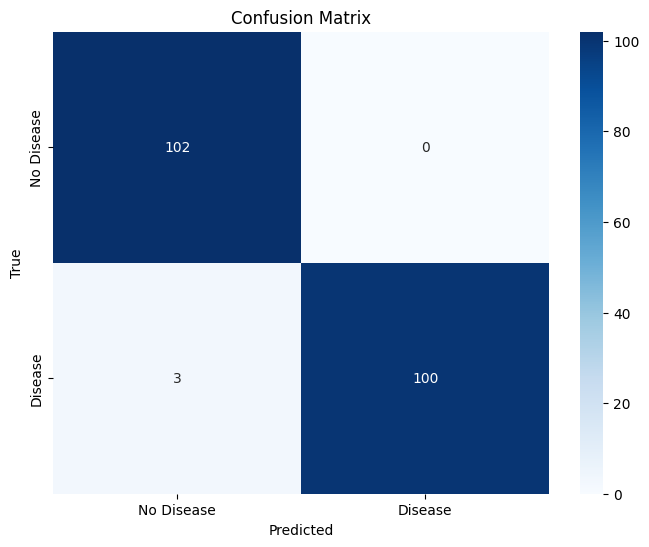

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
importances = model.feature_importances_
feature_names = X.columns

In [14]:
indices = np.argsort(importances)[::-1]

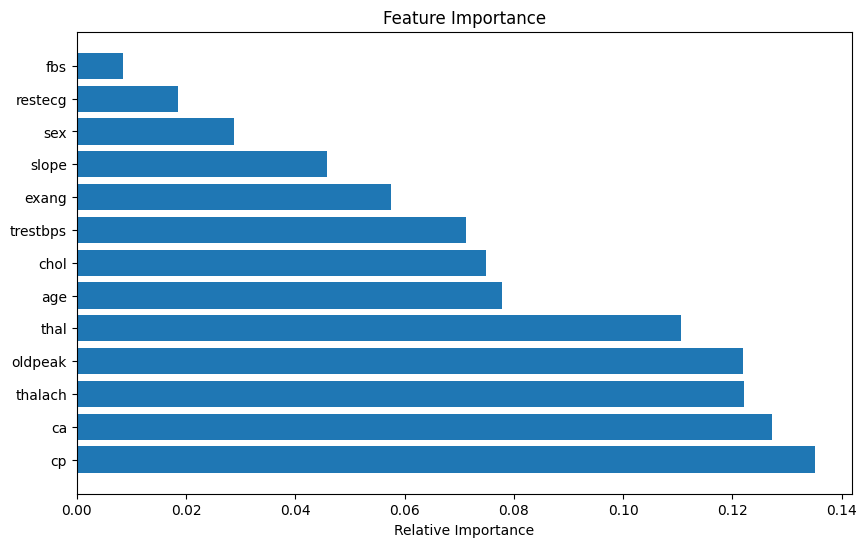

In [15]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel('Relative Importance')
plt.show()